# Using CNN for Image Classification On Fashion mnist Dataset

In [40]:
# importing lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [41]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

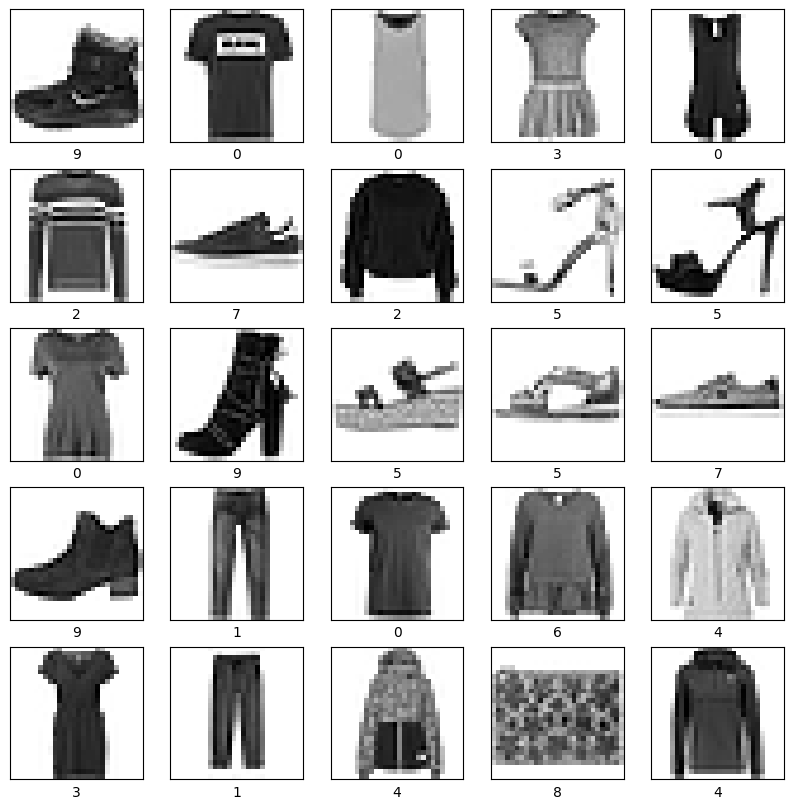

In [42]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [43]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
y_train.shape

(60000,)

In [46]:
# checking the shape of each training and testing datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

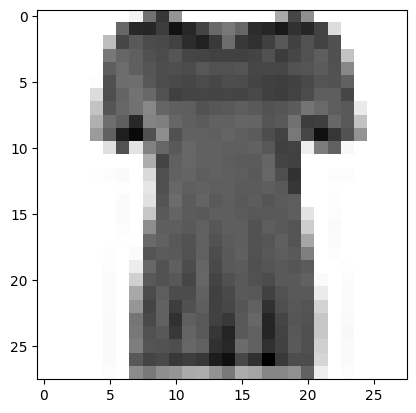

In [48]:
# plotting the first image in the training set
plt.imshow(X_train[10], cmap=plt.cm.binary)

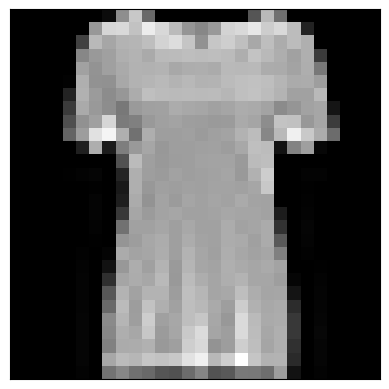

Pixel values:
  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0 
  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0 
  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0 
  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0 
  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0 
  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0 
  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0 
  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0 
  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 141 19

In [51]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[10], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[10]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [52]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [54]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[10]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.043 0.557 0.784 0.416 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.333 0.725 0.439 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.596 0.839 0.851 0.761 0.925 0.847 0.733 0.584 0.529 0.600 0.827 0.851 0.906 0.804 0.851 0.737 0.133 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.259 0.725 0.651 0.706 0.710 0.745 0.827 0.867 0.773 0.573 0.776 0.808 0.749 0.659 0.745 0.675 0.737 0.686 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.529 0.600 0.627 0.686 0.706 0.667 0.729 0.733 0.745 0.737 0.745 0.733 0.682 0.765 0.725 0.682 0.631 0.686 0.231 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.631 0.576 0.627 0.667 0.698 0.694 0.706 0.659 0.678 0.682 0.671 0.725 0.722 0.725 0.675 0.671 0.643 0.682 0.471 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.008 0.686 0.573 0.569 0.659 0.698 0.710 0.725 0.706 0.722 0.698 0.702 0.733 0.749 0.757 0.745 

# Building A Neural Model

In [55]:
# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6690 - loss: 0.9157 - val_accuracy: 0.8197 - val_loss: 0.5017
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8339 - loss: 0.4472 - val_accuracy: 0.8538 - val_loss: 0.4095
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8593 - loss: 0.3846 - val_accuracy: 0.8646 - val_loss: 0.3801
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8768 - loss: 0.3454 - val_accuracy: 0.8729 - val_loss: 0.3568
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8842 - loss: 0.3255 - val_accuracy: 0.8777 - val_loss: 0.3414
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8860 - loss: 0.3124 - val_accuracy: 0.8778 - val_loss: 0.3430
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8951 - loss: 0.2960 - val_accuracy: 0.8847 - val_loss: 0.3225
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8975 -

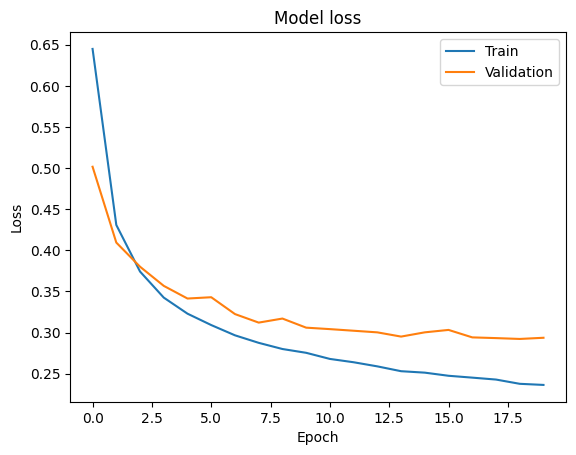

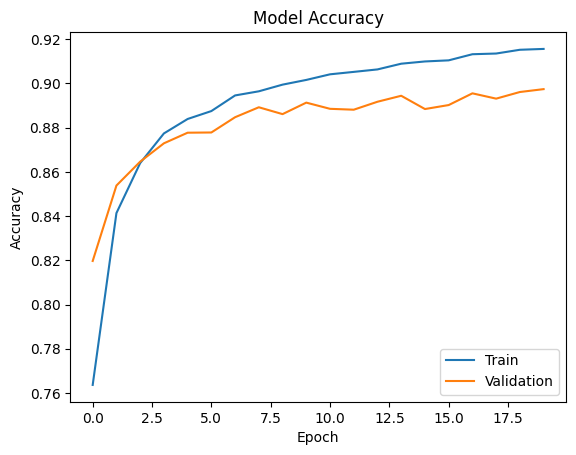

CPU times: total: 12min 19s
Wall time: 6min 10s


In [58]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=3)

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [59]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9040 - loss: 0.2914
Test Loss: 0.2937208414077759
Test Accuracy: 0.8974000215530396


In [60]:
# Save the model to be used later
model.save('models_saved/fashion_mnist_cnn.h5')

# Predicting an image

(28, 28)
(28, 28, 1)


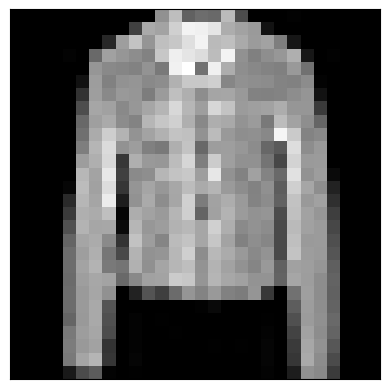

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
The model predicts that this image is a 4.


In [61]:
# grab an image
img = X_test[10]
print(img.shape)
# # rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a {predictions.argmax()}.")